In [1]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline


In [2]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools


In [3]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [4]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [5]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [6]:
total_data = atlas.loc[:, ["Number of Users", "Invoice Amount"]].groupby(["Customers"]).sum()
# total_data.dropna(inplace=True)
total_data

atlas_with_totals = pd.concat([atlas.drop(columns=["Number of Users", "Invoice Amount"]), total_data], axis="columns", join="inner")

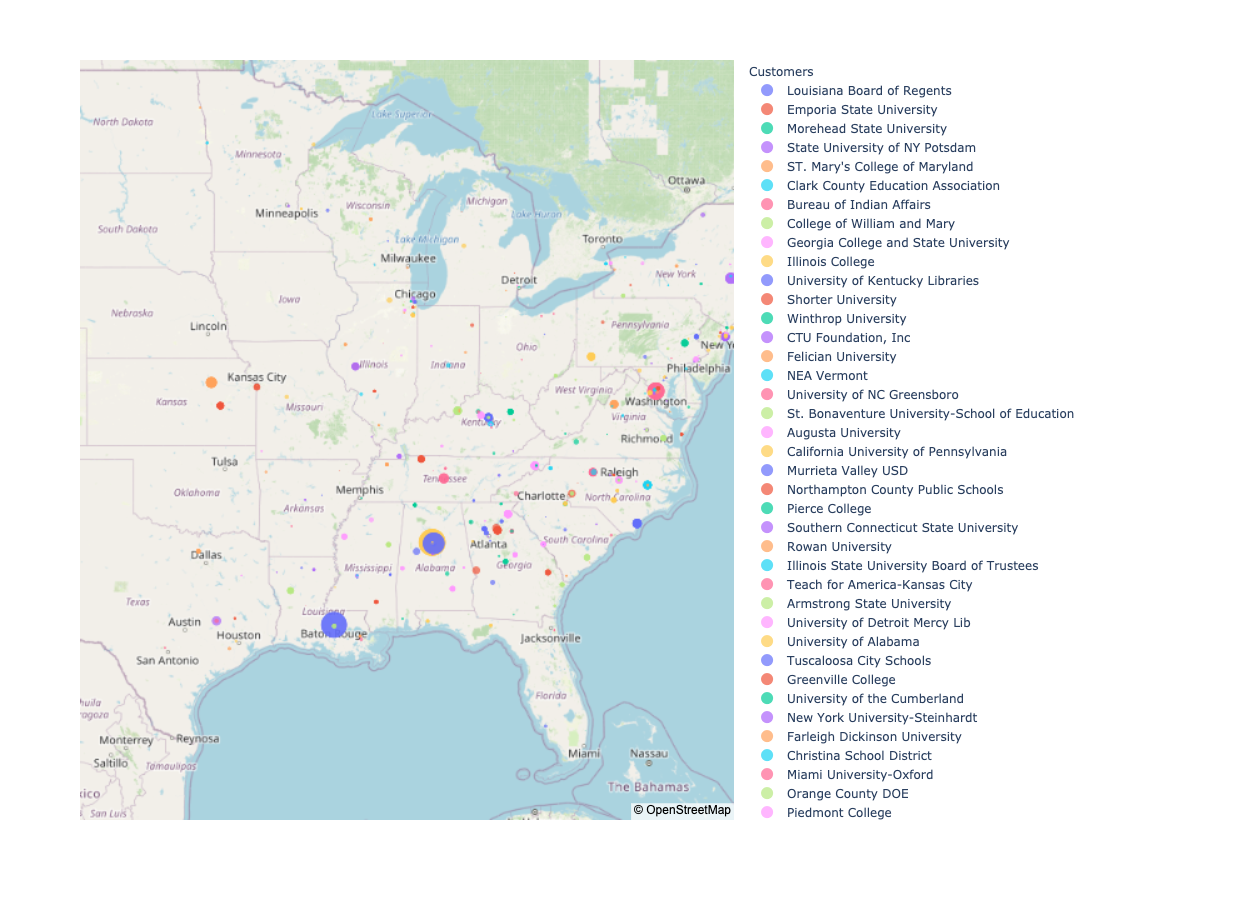

In [7]:
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    atlas_with_totals.reset_index(),
    lat="Lat",
    lon="Long",
    # size="Invoice Amount",
    size="Invoice Amount",
    color="Customers",
    width=1800,
    height=900,
    zoom=4,
    mapbox_style="open-street-map"  # Options: [ "open-street-map, white-bg, carto-positron, carto-darkmatter, stamen-terrain, stamen-toner, stamen-watercolor" ]
)
map.show()


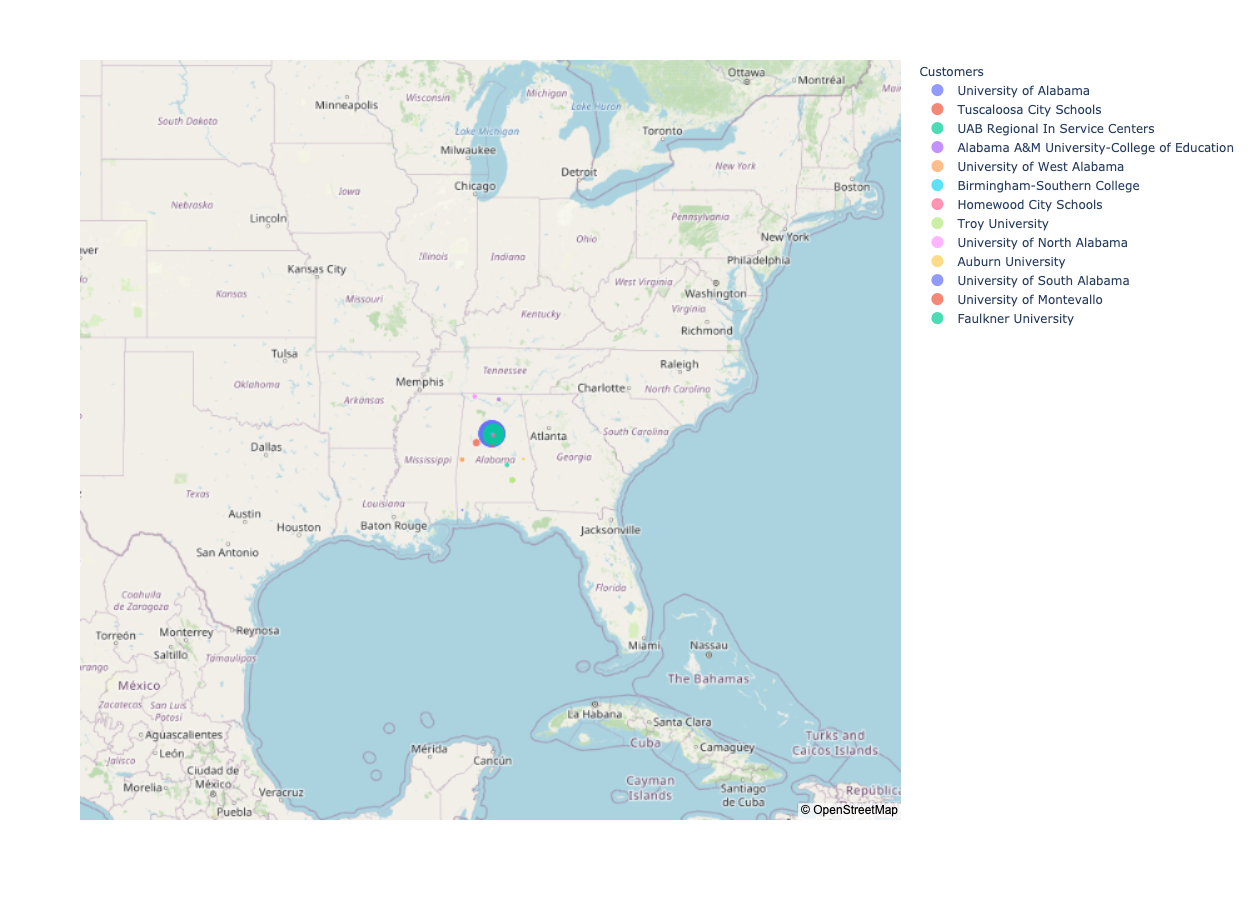

Column
    [0] Column
        [0] Select(name='state', options=['AL', 'AK', 'AZ', ...], value='AL')
    [1] Row
        [0] Str(None, name='interactive01457')

In [12]:
# Group by year and neighborhood and then create a new dataframe of the mean values
atlas_with_totals["ServiceStart_Year"] = atlas_with_totals["Service Start"].apply(lambda x: x.year)
atlas_with_totals_grouped = atlas_with_totals.groupby(["ServiceStart_Year", "State"]).sum()
atlas_with_totals_grouped.head(5)

def generate_map(state):
    data = atlas_with_totals.reset_index().set_index("State").loc[state]
    map = px.scatter_mapbox(
        data.reset_index(),
        lat="Lat",
        lon="Long",
        size="Invoice Amount",
        # size="Number of Users",
        color="Customers",
        width=1800,
        height=900,
        zoom=4,
        mapbox_style="open-street-map"  # Options: [ "open-street-map, white-bg, carto-positron, carto-darkmatter, stamen-terrain, stamen-toner, stamen-watercolor" ]
    )
    return map.show()

interact(generate_map, state=constants.DROP_DOWNS_STATE_ABBREVIATION_LIST)